In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv("AirPassengers.csv")
df["Month"] = pd.to_datetime(df["Month"])
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


[1.         0.94804734 0.87557484 0.80668116 0.75262542 0.71376997
 0.6817336  0.66290439 0.65561048 0.67094833 0.70271992 0.74324019
 0.76039504 0.71266087 0.64634228 0.58592342 0.53795519 0.49974753
 0.46873401 0.44987066 0.4416288  0.45722376 0.48248203 0.51712699
 0.53218983 0.49397569 0.43772134 0.3876029  0.34802503 0.31498388
 0.28849682]


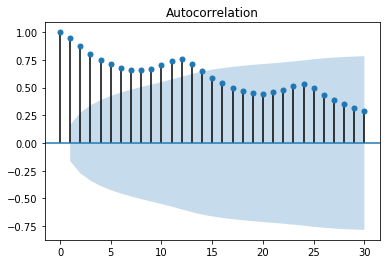

[ 1.          0.95467704 -0.26527732  0.05546955  0.10885622  0.08112579
  0.00412541  0.15616955  0.10370833  0.28878144  0.20691805  0.2411297
 -0.15800498 -0.7183246  -0.08948064  0.22160591  0.13462253  0.11561572
  0.1948294   0.09665618 -0.20215868 -0.0936381  -0.34559457 -0.10617021
  0.27780472  0.05878159  0.00986624  0.23768737  0.09405682 -0.14750542
 -0.18860905]


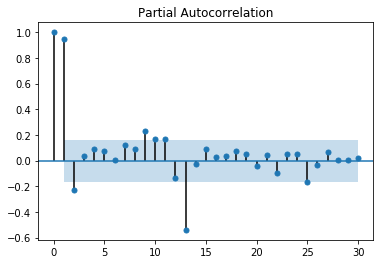

In [3]:
ts_acf = sm.tsa.stattools.acf(df["#Passengers"],nlags=30)
print(ts_acf)
sm.graphics.tsa.plot_acf(df["#Passengers"], lags=30)
plt.show()

ts_acf = sm.tsa.stattools.pacf(df["#Passengers"],nlags=30)
print(ts_acf)
sm.graphics.tsa.plot_pacf(df["#Passengers"], lags=30)
plt.show()

#### ARモデル
- $y_t = c + \sum_{i=1}^{p}\phi_i y_{t - i} + \epsilon_t, \, \epsilon_t \sim N(0, \sigma^2)$
- 要は，過去の自分のデータを説明変数とした回帰モデル
- 過去の自分のデータをモデルに組み込むことで自己相関を表現
- 定常条件は$1 - \phi_iz-...-\phi_pz^p=0$の解の絶対値が1より大きい

#### MAモデル
- $y_t = \mu + \sum_{j=1}^{q}\theta_j \epsilon_{t-j} + \epsilon_{t}, \, \epsilon_t \sim N(0, \sigma^2)$
  - $\epsilon_t$はノイズ，$\theta$はある程度自由に設定可能
- 「過去と未来で共通の値を使用する」ことで自己相関を表現
- 反転可能性を満たす条件は，$1+\theta_1z+...+\theta_qz^q=0$

#### ARMAモデル
- $y_t = c + \sum_{i=1}^{p}\phi_iy_{t-i}+\epsilon_t+\sum_{j=1}^q\theta_j\epsilon_{t-j}$

#### ARIMAモデル
- 自己回帰和分移動平均モデル
  - 非定常過程に対してARMAを使うことができない
  - 和文家庭に対しては，差分をとることで定常過程に変換することができる
  - 差分をとってからARMAモデルを推定すること

#### SARIMAモデル
- ARIMAに季節成分を入れたもの
  - 例えば，月単位の気温データだとしたら，去年の同じ月の値をモデルに入れる
- 1周期がsであるデータ(月単位データならs=12)において，ARIMAの次数(p,d,q)と，季節性の字数(P,D,Q)をあわせて，$SARIMA(p,d,q)(P,D,Q)[s]$と表記する
  - 季節階差をとったデータに対するARIMAモデル

#### ARIMAXモデル
- 外生変数が入ったARIMAモデル
- $y_t = c + \sum_{i=1}^{p}\phi_iy_{t-i} + \epsilon_t + \sum_{j=1}^{q}\theta_j\epsilon_{t-j} + \sum_{k=1}^{r}\beta_kx_{k,t}$
  - $r$個の説明変数，時点$t$における$k$番目の変数を$x_{k,t}$
- ARIMA Errorモデルと言う見方もある
  - 線形回帰モデルをデータに適用する
  - 線形回帰モデルの残差に対してARIMAモデルを適用する
  - やってることはARIMAXと一緒

### モデルの同定
- ARMAの場合
  - 次数の決定：モデル選択
  - 差分の階数の決定：単位根検定
  - モデルの評価
- モデルの同定とパラメタの推定は一緒じゃない．間違えやすいので注意
  - ARMAの場合，$\phi$を求めることがパラメタ推定

#### AIC
- 尤度：パラメタが与えられたときに，手持ちのデータが得られる確率
  - 小さい値になりやすいので対数として取り扱う事が多い
  - 対数尤度を最大にするパラメタを推定量として使用することを「最尤法」と呼ぶ
- AIC：-2(最大化対数尤度)+2(推定されたパラメータの数)
  - 尤度にパラメタという罰則項を入れた式
  - モデルが複雑になりすぎるのを防ぐ

### 単位根検定
- 差分階数を決定するもの

#### KPSS検定
- 帰無仮説：単位根なし 対立仮説：単位根あり
  - 危険率5%で優位となったならば，差分を取るべきだと判断
- $y_t = \alpha + \beta t + \sum_{i=1}^{t}u_i+\epsilon_t$
  - $\epsilon_t$は定常過程であり，$u_i \sim iid(0, \sigma_u^2)$
  - 帰無仮説：$\sigma_u^2=0$ 対立仮説：$\sigma_u^2 \neq 0$
  
#### ADF検定
- 帰無仮説：単位根あり 対立仮説：単位根なし
- AR(1)モデルの場合(DF検定)
  - $y_t=\phi_1y_{t-1}+\epsilon_{t}, \, \epsilon_t \sim N(0, \sigma^2)$
  - 帰無仮説：$\phi_1=1$ 対立仮説：$|\phi_i| < 1$
- DF検定の拡張がADF検定

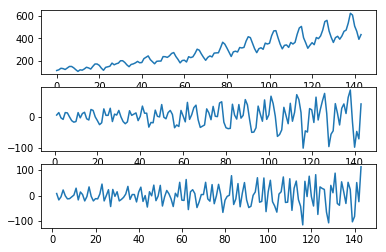

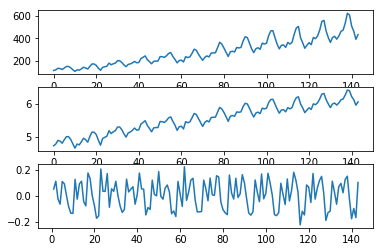

In [4]:
df["#Passengers_1d"] = df["#Passengers"] - df["#Passengers"].shift()
df["#Passengers_2d"] = df["#Passengers_1d"] - df["#Passengers_1d"].shift()
plt.subplot(311)
plt.plot(df["#Passengers"])
plt.subplot(312)
plt.plot(df["#Passengers_1d"])
plt.subplot(313)
plt.plot(df["#Passengers_2d"])
plt.show()
df["#Passengers_log"] = df["#Passengers"].apply(np.log)
df["#Passengers_log_1d"] = df["#Passengers_log"] - df["#Passengers_log"].shift()
plt.subplot(311)
plt.plot(df["#Passengers"])
plt.subplot(312)
plt.plot(df["#Passengers_log"])
plt.subplot(313)
plt.plot(df["#Passengers_log_1d"])
plt.show()

In [5]:
# https://logics-of-blue.com/python-time-series-analysis/
# ARMA推定関数の実行，情報量基準，トレンドの有無が引数
sm.tsa.arma_order_select_ic(df["#Passengers_1d"].dropna().values, ic="aic", trend="nc")

/usr/local/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


{'aic':              0            1            2
 0          NaN  1397.257791  1397.093436
 1  1401.852641  1412.615224  1385.496795
 2  1396.587654  1378.338024  1353.175673
 3  1395.021214  1379.614000  1351.138721
 4  1388.216680  1379.616584  1373.560615, 'aic_min_order': (3, 2)}

In [6]:
from statsmodels.tsa.arima_model import ARIMA
ARIMA_3_1_2 = ARIMA(df["#Passengers"].astype(float).values, order=(3,1,2)).fit(dist=False)
ARIMA_3_1_2.params

/usr/local/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


array([ 2.67349083,  0.26198234,  0.36783855, -0.36346047, -0.07503946,
       -0.92483864])

In [7]:
ARIMA_3_1_2.summary()
ARIMA_3_1_2.summary2()

/usr/local/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARIMA
===================================================================
Model:              ARIMA            BIC:                 1381.4895
Dependent Variable: D.y              Log-Likelihood:      -673.37  
Date:               2018-05-10 13:33 Scale:               1.0000   
No. Observations:   143              Method:              css-mle  
Df Model:           6                Sample:              1        
Df Residuals:       137                                   4        
Converged:          1.0000           S.D. of innovations: 26.399   
AIC:                1360.7496        HQIC:                1369.177 
--------------------------------------------------------------------
                Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
const           2.6735    0.1380   19.3763  0.0000   2.4031   2.9439
ar.L1.D.y       0.2620    0.0991    2.6428  0.0092   0.0677   0.4563
ar.L2.D.y       0.3678    0.1097    3.3517  0.0010   0.1527   0.5829
ar.L3.D.y      -0.3635    0.0917   -3.9639  0.0001  -0.5432  -0.1837
ma.L1.D.y      -0.0750    0.0615   -1.2197  0.2247  -0.1956   0.0455
ma.L2.D.y      -0.9248    0.0606  -15.2603  0.0000  -1.0436  -0.8061
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1          -1.2679            -0.0000           1.2679            -0.5000
AR.2           1.1400            -0.9330           1.4731            -0.1092
AR.3           1.1400             0.9330           1.4731             0.1092
MA.1           1.0001             0.0000           1.0001             0.0000
MA.2          -1.0812             0.0000           1.0812             0.5000
===================================================================

"""

/usr/local/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


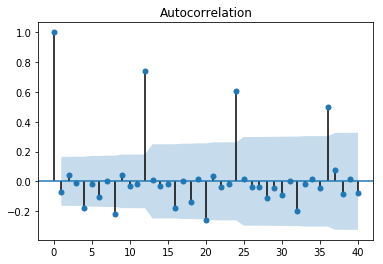

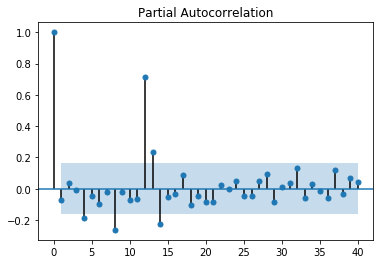

In [8]:
# 残差のチェック
resid = ARIMA_3_1_2.resid
sm.graphics.tsa.plot_acf(resid, lags=40)
plt.show()
sm.graphics.tsa.plot_pacf(resid, lags=40)
plt.show()

- 12ヶ月で高い自己相関が現れている

In [9]:
SARIMA_3_1_2_111 = sm.tsa.SARIMAX(df["#Passengers"].astype(float).values, 
                                  order=(3,1,2), 
                                  seasonal_order=(1,1,1,12)).fit()

/usr/local/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [10]:
SARIMA_3_1_2_111.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(3, 1, 2)x(1, 1, 1, 12)   Log Likelihood                -502.994
Date:                            Thu, 10 May 2018   AIC                           1021.987
Time:                                    13:33:28   BIC                           1045.746
Sample:                                         0   HQIC                          1031.641
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5250      1.690      0.311      0.756      -2.788       3.838
ar.L2          0.2892      0.979      0.295      0.768      -1.629       2.208
ar.L3         -0.0315      0.414     -0.076      0.939      -0.844       0.781
ma.L1         -0.9116      1.716     -0.531      0.595      -4.274       2.451
ma.L2         -0.0627      1.683     -0.037      0.970      -3.360       3.235
ar.S.L12      -0.8796      0.282     -3.117      0.002      -1.433      -0.327
ma.S.L12       0.7860      0.368      2.134      0.033       0.064       1.508
sigma2       125.2536     14.450      8.668      0.000      96.932     153.575
===================================================================================
Ljung-Box (Q):                       51.08   Jarque-Bera (JB):                13.38
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               2.61   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

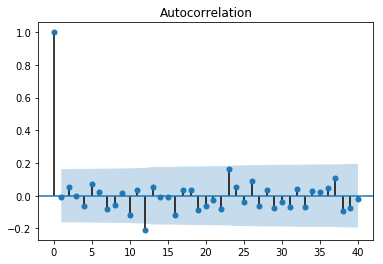

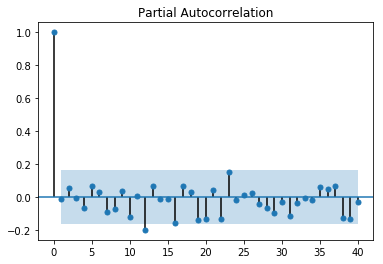

In [11]:
# 残差のチェック
resid = SARIMA_3_1_2_111.resid
sm.graphics.tsa.plot_acf(resid, lags=40)
plt.show()
sm.graphics.tsa.plot_pacf(resid, lags=40)
plt.show()